In [2]:
import requests
from requests.auth import HTTPBasicAuth
import json

# Wordpress site URL and credentials from .env file
from dotenv import load_dotenv
import os
load_dotenv()

url = os.getenv('WP_URL')
user = os.getenv('WP_USER')
password = os.getenv('WP_PASSWORD')

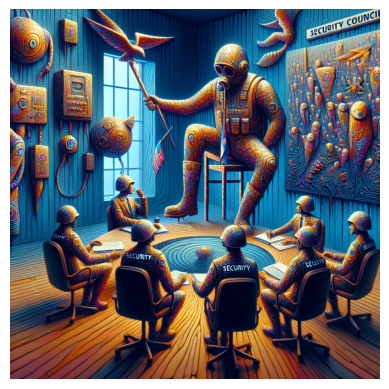

Failed to upload image: b'<!DOCTYPE html>\n<html lang="nl">\n<head>\n\t<meta charset="UTF-8" />\n\t<meta name="viewport" content="width=device-width, initial-scale=1" />\n<meta name=\'robots\' content=\'max-image-preview:large\' />\n<title>Pagina niet gevonden &#8211; AI journalist</title>\n<link rel=\'dns-prefetch\' href=\'//s1.wp.com\' />\n<link rel=\'dns-prefetch\' href=\'//s2.wp.com\' />\n<link rel=\'dns-prefetch\' href=\'//s0.wp.com\' />\n<link rel="alternate" type="application/rss+xml" title="AI journalist &raquo; Feed" href="https://aijournalist3.wordpress.com/feed/" />\n<link rel="alternate" type="application/rss+xml" title="AI journalist &raquo; Reactiesfeed" href="https://aijournalist3.wordpress.com/comments/feed/" />\n\t<script type="text/javascript">\n\t\t/* <![CDATA[ */\n\t\tfunction addLoadEvent(func) {\n\t\t\tvar oldonload = window.onload;\n\t\t\tif (typeof window.onload != \'function\') {\n\t\t\t\twindow.onload = func;\n\t\t\t} else {\n\t\t\t\twindow.onload = function (

In [20]:
import requests
from requests.auth import HTTPBasicAuth
import json

# Prepare content and image path
content = "This is an automated post with an image."
image_path = "images/image_20240926_193253.png"

# preview image
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()


post_title = "Automated Article"

# Upload the image to WordPress
def upload_image(image_path):
    media_endpoint = f"{url}/media"
    image_data = open(image_path, 'rb').read()
    filename = image_path.split("/")[-1]

    headers = {
        'Content-Disposition': f'attachment; filename={filename}',
        'Content-Type': 'image/jpeg'
    }

    response = requests.post(media_endpoint,
                             headers=headers,
                             auth=HTTPBasicAuth(user, password),
                             files={'file': (filename, image_data)})

    if response.status_code == 201:
        # Successful upload
        media_id = response.json().get('id')
        print(f"Image uploaded successfully with ID: {media_id}")
        return media_id
    else:
        print(f"Failed to upload image: {response.content}")
        return None

# Create a post with the uploaded image
def create_post(content, post_title, media_id=None):
    post_endpoint = f"{url}/posts"
    post_data = {
        'title': post_title,
        'content': content,
        'status': 'publish',  # To publish immediately, or 'draft'
    }

    if media_id:
        post_data['featured_media'] = media_id  # Set the image as the featured image

    headers = {
        'Content-Type': 'application/json',
    }

    response = requests.post(post_endpoint,
                             auth=HTTPBasicAuth(user, password),
                             headers=headers,
                             data=json.dumps(post_data))

    if response.status_code == 201:
        print(f"Post created successfully: {response.json().get('link')}")
    else:
        print(f"Failed to create post: {response.content}")

# Example usage
media_id = upload_image(image_path)
if media_id:
    create_post(content, post_title, media_id)
else:
    create_post(content, post_title)


In [4]:
load_dotenv()

url = os.getenv('WP_URL')
user = os.getenv('WP_USER')
password = os.getenv('WP_PASSWORD')

response = requests.get(f"{url}/posts", auth=HTTPBasicAuth(user, password))
print(response.status_code)
print(response.content)


200
b'[{"id":1,"date":"2024-10-02T14:21:55","date_gmt":"2024-10-02T14:21:55","guid":{"rendered":"https:\\/\\/aijournalist.meubel-centrum.be\\/?p=1"},"modified":"2024-10-02T14:21:55","modified_gmt":"2024-10-02T14:21:55","slug":"hello-world","status":"publish","type":"post","link":"https:\\/\\/aijournalist.meubel-centrum.be\\/2024\\/10\\/02\\/hello-world\\/","title":{"rendered":"Hello world!"},"content":{"rendered":"\\n<p>Welcome to WordPress. This is your first post. Edit or delete it, then start writing!<\\/p>\\n","protected":false},"excerpt":{"rendered":"<p>Welcome to WordPress. This is your first post. Edit or delete it, then start writing!<\\/p>\\n","protected":false},"author":1,"featured_media":0,"comment_status":"open","ping_status":"open","sticky":false,"template":"","format":"standard","meta":{"footnotes":""},"categories":[1],"tags":[],"class_list":["post-1","post","type-post","status-publish","format-standard","hentry","category-uncategorized"],"_links":{"self":[{"href":"https:

In [8]:
import requests
from requests.auth import HTTPBasicAuth
import json
import os
from dotenv import load_dotenv

load_dotenv()

# Load credentials from .env file
url = os.getenv('WP_URL')
user = os.getenv('WP_USER')
password = os.getenv('WP_PASSWORD')

# Prepare content and image path
content = "This is an automated post with an image."
image_path = "images/image_20240926_193253.png"
post_title = "Automated Article"

def upload_image(image_path):
    media_endpoint = f"{url}/media"
    filename = image_path.split("/")[-1]

    # Dynamically determine the content type based on file extension
    if filename.endswith(".png"):
        content_type = "image/png"
    elif filename.endswith(".jpg") or filename.endswith(".jpeg"):
        content_type = "image/jpeg"
    else:
        print("Unsupported file type")
        return None

    headers = {
        'Content-Disposition': f'attachment; filename={filename}',
        'Content-Type': content_type
    }

    with open(image_path, 'rb') as img_file:
        response = requests.post(media_endpoint,
                                 headers=headers,
                                 auth=HTTPBasicAuth(user, password),
                                 files={'file': (filename, img_file)})

    if response.status_code == 201:
        # Successful upload
        media_id = response.json().get('id')
        print(f"Image uploaded successfully with ID: {media_id}")
        return media_id
    else:
        print(f"Failed to upload image (status code {response.status_code}): {response.content}")
        return None


def create_post(content, post_title, media_id=None):
    post_endpoint = f"{url}/posts"
    post_data = {
        'title': post_title,
        'content': content,
        'status': 'publish',
    }

    if media_id:
        post_data['featured_media'] = media_id

    headers = {
        'Content-Type': 'application/json',
    }

    response = requests.post(post_endpoint,
                             auth=HTTPBasicAuth(user, password),
                             headers=headers,
                             data=json.dumps(post_data))

    if response.status_code == 201:
        print(f"Post created successfully: {response.json().get('link')}")
    else:
        print(f"Failed to create post (status code {response.status_code}): {response.content}")

# Example usage
media_id = upload_image(image_path)
if media_id:
    create_post(content, post_title, media_id)
else:
    create_post(content, post_title)


Failed to upload image (status code 500): b'{"code":"rest_upload_sideload_error","message":"Sorry, you are not allowed to upload this file type.","data":{"status":500}}'
Post created successfully: https://aijournalist.meubel-centrum.be/2024/10/04/automated-article-4/
